# Mahyar Mohammadi Matin - 610398166
### Simulated Annealing for CSP

#### Import libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import math

#### Solution Class
##### Each solution is stored as datatype that has fitness(cost) and permutation. also can make random neighbor.

In [162]:
class Solution:
    data = []
    fit = 0
    
    def __init__(self,inp):
        self.data = pd.Series(inp)
        self.set_fit()
    
    def set_fit(self):
        s=0
        c=1
        for order in self.data:
            s+=order
            if(s>stock):
                s=order
                c+=1
        
        self.fit = c
        
    def __str__(self):
        s=0
        c=1
        g=[]
        res=""
        for order in self.data:
            s+=order
            g.append(order)
            if(s>stock):
                g.pop()
                res+=f'Stock {c}:{str(g)}\n'
                s=order
                g=[order]
                c+=1
        return res+f'Stock {c}:{str(g)}\n'
        
    #generate new neighbor each time called
    def neighbor(self):
        neighbor = self.data.copy()
        i,j = np.random.choice(len(self.data),2,replace=False)
        neighbor[i],neighbor[j] = neighbor[j],neighbor[i]
        return Solution(neighbor)

#### Print plot of the solutions

In [163]:
def multicolored_lines(ls,bests):
    def colorline(x, y, z=None, cmap='turbo', norm=plt.Normalize(0, 1),linewidth=3, alpha=1.0):
        def make_segments(x, y):
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            return segments

        if z is None:
            z = np.linspace(1, 0, len(x))

        if not hasattr(z, "__iter__"):
            z = np.array([z])

        z = np.asarray(z)

        segments = make_segments(x, y)
        lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                                  linewidth=linewidth, alpha=alpha)

        ax = plt.gca()
        ax.add_collection(lc)

        return lc

    x = pd.Series(list(range(len(ls))))
    y = pd.Series(ls)
    fig, ax = plt.subplots()
    lc = colorline(x, y)
    plt.colorbar(lc)
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min()-10, y.max()+5)
    ax.plot(pd.Series(list(range(len(bests)))),bests,color='black')
    plt.show()

#### Main Code

In [191]:
def run(stock,reqs,alpha,markov=None):
    T = 1
    best = Solution(reqs)
    if(markov==None):markov = len(req)*100
    ls = []
    bests = []
    c=0
    while(T>0.001):
        current = Solution(np.random.choice(reqs,len(reqs),replace=False))
        for _ in range(markov):
            neighbor = current.neighbor()
            if(current.fit>=neighbor.fit):
                current=neighbor
                if(current.fit<best.fit):
                    best=current
            else:
                if(np.random.choice([0,1],1,p=[1-T,T])):
                    current=neighbor
            ls.append(current.fit)
            bests.append(best.fit)
        
        if(c%20==0):print(f'on temperture {T}, best fit is: {best.fit}')
        c+=1
        T*=alpha
    print(f'result(with {best.fit} stock used):',list(best.data))
    print(best)
    multicolored_lines(ls,bests)

#### input1.stock
##### open file and calculate answer

on temperture 1, best fit is: 57
on temperture 0.35848592240854177, best fit is: 55
on temperture 0.1285121565651031, best fit is: 54
on temperture 0.04606979898695193, best fit is: 54
on temperture 0.016515374385013576, best fit is: 53
result(with 53 stock used): [457, 149, 365, 135, 402, 23, 211, 125, 987, 805, 84, 549, 79, 368, 346, 251, 312, 414, 306, 149, 116, 351, 506, 337, 119, 180, 412, 544, 988, 788, 117, 592, 280, 86, 46, 61, 788, 80, 437, 441, 518, 460, 92, 424, 230, 70, 181, 106, 18, 463, 109, 266, 356, 405, 753, 246, 92, 532, 295, 370, 88, 171, 315, 292, 581, 249, 716, 868, 517, 78, 106, 286, 145, 75, 525, 60, 286, 148, 495, 186, 632, 125, 371, 88, 501, 662, 43, 115, 118, 333, 45, 241, 555, 301, 967, 678, 218, 126, 753, 283, 507, 278, 284, 106, 71, 144, 107, 170, 686, 123, 224, 653, 515, 53, 187, 149, 33, 618, 268, 69, 557, 264, 312, 660, 914, 689, 106, 248, 557, 672, 266, 409, 557, 232, 99, 648, 933, 627, 609, 354]
Stock 1:[457, 149, 365]
Stock 2:[135, 402, 23, 211, 125]


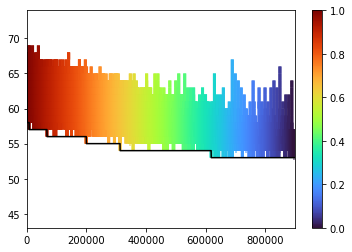

In [165]:
file = open('D:\\input1.stock')
inp = file.read()
file.close()
stock = int(inp.split('\n')[0].split(' ')[-1])
req = list(map(int,inp.split('\n')[3].split(',')))
run(stock,req,alpha=0.95)

#### input2.stock

on temperture 1, best fit is: 85
on temperture 0.5437943429267471, best fit is: 84
on temperture 0.2957122873991326, best fit is: 84
on temperture 0.1608066690215767, best fit is: 83
on temperture 0.08744575691882718, best fit is: 82
on temperture 0.04755250792540567, best fit is: 81
on temperture 0.02585878480181489, best fit is: 81
on temperture 0.014061860890187084, best fit is: 81
on temperture 0.007646760403106604, best fit is: 80
on temperture 0.004158265048925623, best fit is: 80
on temperture 0.0022612410099957657, best fit is: 79
on temperture 0.0012296500692296614, best fit is: 79
result(with 79 stock used): [1380, 2000, 1930, 1880, 2140, 1520, 1520, 2000, 1710, 1520, 1930, 1710, 2200, 2150, 1710, 2100, 1380, 2200, 2150, 2100, 2100, 1380, 1380, 1710, 2140, 2050, 1880, 1520, 1380, 2140, 2050, 1880, 2050, 2100, 2000, 1380, 1930, 2150, 1380, 1520, 2150, 1880, 2000, 2200, 2150, 2200, 1710, 1880, 1560, 1820, 1880, 1820, 1520, 2150, 1820, 1880, 2050, 1520, 2000, 1380, 2100, 1820, 1

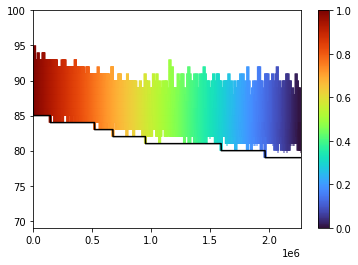

In [193]:
file = open('D:\\input2.stock')
inp = file.read()
file.close()
stock = int(inp.split('\n')[0].split(' ')[-1])
req = list(map(int,inp.split('\n')[3].split(',')))
run(stock,req,alpha=0.97,markov=10000)

#### input3.stock

on temperture 1, best fit is: 110
on temperture 0.5437943429267471, best fit is: 106
on temperture 0.2957122873991326, best fit is: 105
on temperture 0.1608066690215767, best fit is: 103
on temperture 0.08744575691882718, best fit is: 102
on temperture 0.04755250792540567, best fit is: 101
on temperture 0.02585878480181489, best fit is: 101
on temperture 0.014061860890187084, best fit is: 99
on temperture 0.007646760403106604, best fit is: 99
on temperture 0.004158265048925623, best fit is: 99
on temperture 0.0022612410099957657, best fit is: 98
on temperture 0.0012296500692296614, best fit is: 98
result(with 98 stock used): [9, 133, 7, 11, 12, 18, 7, 6, 16, 204, 8, 37, 21, 5, 7, 12, 11, 403, 2, 17, 2, 66, 5, 277, 1, 12, 8, 27, 6, 43, 1, 224, 2, 2, 9, 9, 5, 36, 19, 4, 16, 13, 96, 9, 7, 18, 10, 174, 16, 1, 12, 3, 163, 7, 7, 3, 7, 1, 8, 2, 4, 2, 5, 237, 134, 10, 8, 1, 3, 43, 1, 1, 2, 6, 3, 11, 34, 21, 214, 243, 271, 167, 2, 8, 4, 5, 15, 5, 8, 4, 2, 4, 15, 132, 4, 7, 6, 275, 17, 5, 18, 11

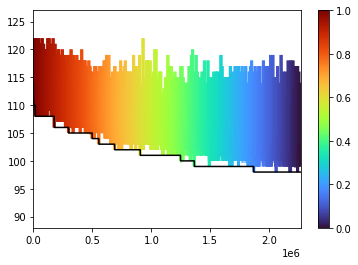

In [199]:
file = open('D:\\input3.stock')
inp = file.read()
file.close()
stock = int(inp.split('\n')[0].split(' ')[-1])
req = list(map(int,inp.split('\n')[3].split(',')))
run(stock,req,alpha=0.97,markov=10000)

#### input4.stock

on temperture 1, best fit is: 246
on temperture 0.5437943429267471, best fit is: 240
on temperture 0.2957122873991326, best fit is: 238
on temperture 0.1608066690215767, best fit is: 233
on temperture 0.08744575691882718, best fit is: 232
on temperture 0.04755250792540567, best fit is: 229
on temperture 0.02585878480181489, best fit is: 225
on temperture 0.014061860890187084, best fit is: 225
on temperture 0.007646760403106604, best fit is: 224
on temperture 0.004158265048925623, best fit is: 222
on temperture 0.0022612410099957657, best fit is: 222
on temperture 0.0012296500692296614, best fit is: 220
result(with 220 stock used): [2, 24, 20, 31, 81, 15, 84, 3, 11, 35, 26, 15, 6, 10, 44, 54, 1, 63, 37, 80, 7, 12, 18, 9, 67, 17, 6, 72, 4, 6, 17, 24, 4, 29, 13, 6, 4, 4, 14, 63, 55, 25, 13, 7, 87, 11, 6, 32, 22, 5, 7, 16, 72, 24, 5, 34, 9, 26, 4, 16, 17, 71, 3, 38, 11, 6, 44, 8, 35, 1, 56, 28, 3, 6, 25, 27, 9, 47, 1, 2, 9, 4, 31, 9, 38, 15, 32, 2, 78, 14, 11, 72, 6, 5, 33, 3, 11, 7, 5, 5,

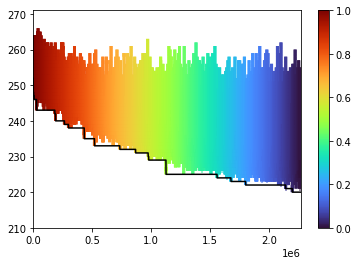

In [203]:
file = open('D:\\input4.stock')
inp = file.read()
file.close()
stock = int(inp.split('\n')[0].split(' ')[-1])
req = list(map(int,inp.split('\n')[3].split(',')))
run(stock,req,alpha=0.97,markov=10000)

#### input5.stock

on temperture 1, best fit is: 4777
on temperture 0.5437943429267471, best fit is: 4752
on temperture 0.2957122873991326, best fit is: 4721
on temperture 0.1608066690215767, best fit is: 4709
on temperture 0.08744575691882718, best fit is: 4709
on temperture 0.04755250792540567, best fit is: 4697
on temperture 0.02585878480181489, best fit is: 4696
on temperture 0.014061860890187084, best fit is: 4694
on temperture 0.007646760403106604, best fit is: 4693
on temperture 0.004158265048925623, best fit is: 4678
on temperture 0.0022612410099957657, best fit is: 4678
on temperture 0.0012296500692296614, best fit is: 4678
result(with 4678 stock used): [2, 252, 2, 71, 591, 324, 11, 268, 10, 23, 11, 3, 193, 9, 187, 46, 1, 623, 8, 27, 2, 8, 173, 225, 35, 138, 64, 5, 41, 4, 7, 207, 323, 11, 88, 4, 1, 17, 3, 182, 14, 6, 236, 8, 258, 11, 1, 2, 171, 102, 19, 1, 9, 7, 121, 58, 116, 1, 200, 127, 66, 39, 17, 143, 58, 15, 136, 2, 19, 39, 4, 50, 1, 1, 10, 7, 319, 193, 4, 16, 11, 17, 3, 98, 2, 55, 200, 12,

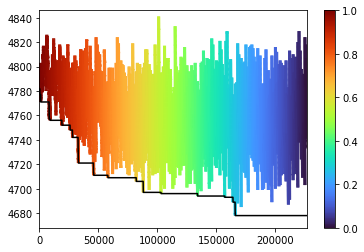

In [206]:
file = open('D:\\input5.stock')
inp = file.read()
file.close()
stock = int(inp.split('\n')[0].split(' ')[-1])
req = list(map(int,inp.split('\n')[3].split(',')))
run(stock,req,alpha=0.97,markov=1000)

#### so each solution is a permutation. this permutation means fill stock until you cant fill it anymore. then go to the next stock.


#### for temperature function i tried linear and non-linear functions but the linear function with T2=T1**0.97 worked the best. also markov chain length of 10000 give us the best result.(unfortunantly we can use it for large inputs like input4 but it's work pretty well with other.


#### the neighborhood of a solution define simply with just swap two order in permutation.